In [1]:
import numpy as np
import pandas as pd

In [2]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [3]:
# code here
# i. Create a DataFrame birds from the above dictionary data which has the index labels.
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

birds = pd.DataFrame(data, index=labels)
birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [4]:
# ii. Display basic information about the dataFrame.
birds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [5]:
# iii. Show Alternate rows of the dataframe.
birds[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [6]:
# code here
# i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

# birds[["birds", "age"]].loc[['a', 'c', 'g']]
birds[["birds", "age"]].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [7]:
# ii. Select rows where the number of visits is less than 4.
birds[birds["visits"] < 4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [8]:
# code here
# i. Select all rows with nan values in age and visits column.

birds[birds.isna().any(axis=1)][["age", "visits"]]

,age,visits
d,NaN,4
h,NaN,2


###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [9]:
# i. Find the total number of visits of the bird Cranes

birds[birds["birds"] == "Cranes"]["visits"].sum()

14

In [10]:
# ii. Find the number of each type of birds in dataframe.

# print(birds["birds"].unique())
# print("Cranes:", birds[birds["birds"] == "Cranes"]["birds"].count())
# print("Plovers:", birds[birds["birds"] == "plovers"]["birds"].count())
# print("Spoonbills:", birds[birds["birds"] == "spoonbills"]["birds"].count())
# ************************************

# bird = birds["birds"].unique()
# for i in bird:
#     print(i,":", birds[birds["birds"] == i]["birds"].count())
# **************************************

# bird = birds["birds"].unique()
# iter_obj = np.nditer(bird, flags=['refs_ok'])
# for bird_type in iter_obj:
#     print(bird_type,":", birds[birds["birds"] == bird_type]["birds"].count())

# ***************************************

birds["birds"].value_counts()

Cranes        5
spoonbills    4
plovers       2
Name: birds, dtype: int64

In [11]:
# iii. Print no of duplicate rows
birds.duplicated().sum()

1

In [12]:
# iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.
birds.drop_duplicates(inplace=True)
birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [13]:
# code here
ipl = pd.read_csv(r"C:\Users\atif\Dropbox\Data Science CampusX\Pandas Tutorial\IPL_Matches_2008_2022.csv")
ipl[["Team1", "Team2", "TossWinner", "WinningTeam"]]

,Team1,Team2,TossWinner,WinningTeam
0,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,Gujarat Titans
1,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals
2,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,Royal Challengers Bangalore
3,Rajasthan Royals,Gujarat Titans,Gujarat Titans,Gujarat Titans
4,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,Punjab Kings
...,...,...,...,...
945,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders
946,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
947,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
948,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings


In [14]:
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}

ipl[["Team1", "Team2", "TossWinner", "WinningTeam"]] = ipl[["Team1", "Team2", "TossWinner", "WinningTeam"]].replace(team_name_mapping)
ipl.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<AxesSubplot:>

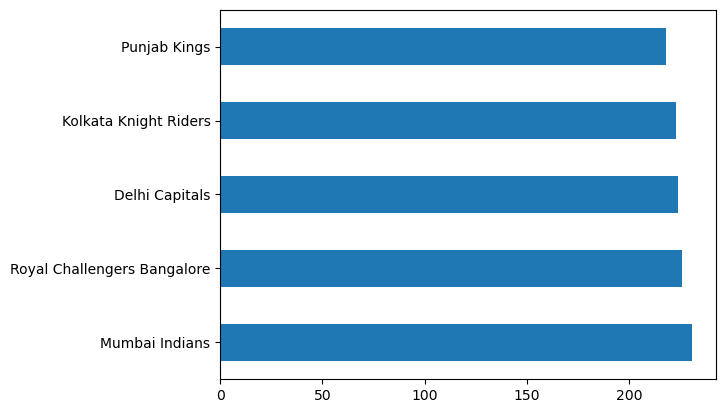

In [15]:
# code here
(ipl["Team1"].value_counts() + ipl["Team2"].value_counts()).sort_values(ascending=False).head(5).plot(kind="barh", rot=0)
   

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [16]:
# code here
ipl[["WinningTeam","Player_of_Match"]].value_counts().sort_values(ascending=False)

WinningTeam                  Player_of_Match
Royal Challengers Bangalore  AB de Villiers     23
                             CH Gayle           17
Mumbai Indians               RG Sharma          15
Chennai Super Kings          MS Dhoni           15
Mumbai Indians               KA Pollard         14
                                                ..
Sunrisers Hyderabad          AJ Finch            1
                             A Zampa             1
                             A Nehra             1
Chennai Super Kings          KMDN Kulasekara     1
Sunrisers Hyderabad          Yuvraj Singh        1
Length: 403, dtype: int64

In [17]:
ipl["Player_of_Match"].value_counts().sort_values(ascending=False)

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
                  ..
R Bhatia           1
S Badrinath        1
A Singh            1
SB Jakati          1
MF Maharoof        1
Name: Player_of_Match, Length: 262, dtype: int64

In [18]:
# ipl[ipl[["WinningTeam", "Player_of_Match"]] == "AB de Villiers"].any(axis=1)
mask = ipl["Player_of_Match"]=="AB de Villiers"
ipl[mask]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
112,1254079,Ahmedabad,2021-04-27,2021,22,Royal Challengers Bangalore,Delhi Capitals,"Narendra Modi Stadium, Ahmedabad",Delhi Capitals,field,N,Royal Challengers Bangalore,Runs,1.0,NaN,AB de Villiers,"['V Kohli', 'D Padikkal', 'RM Patidar', 'GJ Ma...","['PP Shaw', 'S Dhawan', 'SPD Smith', 'RR Pant'...",S Ravi,VK Sharma
124,1254067,Chennai,2021-04-18,2021,10,Royal Challengers Bangalore,Kolkata Knight Riders,"MA Chidambaram Stadium, Chepauk, Chennai",Royal Challengers Bangalore,bat,N,Royal Challengers Bangalore,Runs,38.0,NaN,AB de Villiers,"['V Kohli', 'D Padikkal', 'RM Patidar', 'GJ Ma...","['N Rana', 'Shubman Gill', 'RA Tripathi', 'EJG...",C Shamshuddin,Nitin Menon
160,1216522,NaN,2020-10-17,2020/21,33,Rajasthan Royals,Royal Challengers Bangalore,Dubai International Cricket Stadium,Rajasthan Royals,bat,N,Royal Challengers Bangalore,Wickets,7.0,NaN,AB de Villiers,"['RV Uthappa', 'BA Stokes', 'SV Samson', 'SPD ...","['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...",AK Chaudhary,Nitin Menon
166,1216540,NaN,2020-10-12,2020/21,28,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Royal Challengers Bangalore,Runs,82.0,NaN,AB de Villiers,"['AJ Finch', 'D Padikkal', 'V Kohli', 'AB de V...","['T Banton', 'Shubman Gill', 'N Rana', 'EJG Mo...",RK Illingworth,K Srinivasan
184,1216547,NaN,2020-09-28,2020/21,10,Royal Challengers Bangalore,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,Y,Royal Challengers Bangalore,SuperOver,NaN,NaN,AB de Villiers,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",Nitin Menon,PR Reiffel
212,1178417,Bengaluru,2019-04-24,2019,42,Royal Challengers Bangalore,Punjab Kings,M.Chinnaswamy Stadium,Punjab Kings,field,N,Royal Challengers Bangalore,Runs,17.0,NaN,AB de Villiers,"['PA Patel', 'V Kohli', 'AB de Villiers', 'MM ...","['KL Rahul', 'CH Gayle', 'MA Agarwal', 'DA Mil...",BNJ Oxenford,C Shamshuddin
227,1178403,Chandigarh,2019-04-13,2019,28,Punjab Kings,Royal Challengers Bangalore,Punjab Cricket Association IS Bindra Stadium,Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,8.0,NaN,AB de Villiers,"['KL Rahul', 'CH Gayle', 'MA Agarwal', 'SN Kha...","['PA Patel', 'V Kohli', 'AB de Villiers', 'MP ...",S Ravi,UV Gandhe
263,1136611,Bengaluru,2018-05-17,2018,51,Royal Challengers Bangalore,Sunrisers Hyderabad,M.Chinnaswamy Stadium,Sunrisers Hyderabad,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,AB de Villiers,"['PA Patel', 'V Kohli', 'AB de Villiers', 'MM ...","['S Dhawan', 'AD Hales', 'KS Williamson', 'MK ...",AY Dandekar,S Ravi
269,1136605,Delhi,2018-05-12,2018,45,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,5.0,NaN,AB de Villiers,"['PP Shaw', 'JJ Roy', 'SS Iyer', 'RR Pant', 'V...","['PA Patel', 'MM Ali', 'V Kohli', 'AB de Villi...",KN Ananthapadmanabhan,HDPK Dharmasena
295,1136579,Bengaluru,2018-04-21,2018,19,Delhi Capitals,Royal Challengers Bangalore,M.Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,6.0,NaN,AB de Villiers,"['JJ Roy', 'G Gambhir', 'SS Iyer', 'RR Pant', ...","['Q de Kock', 'M Vohra', 'V Kohli', 'AB de Vil...",CB Gaffaney,CK Nandan


###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [19]:
# code here
def team1_vs_team2(team1, team2):
    x = ipl[((ipl["Team1"] == team1) | (ipl["Team1"] == team2)) & ((ipl["Team2"] == team1) | (ipl["Team2"] == team2))]["WinningTeam"].value_counts()       
    y = ipl[((ipl["Team1"] == team1) | (ipl["Team1"] == team2)) & ((ipl["Team2"] == team1) | (ipl["Team2"] == team2))][["Player_of_Match", "WinningTeam"]].value_counts().sort_values(ascending=False).head(1)
    
    print('***Summary "{}" VS "{}"***\n'.format(team1, team2))
    print(f"{team1} wins: {x[0]} matches\n{team2} wins: {x[1]} matches\n")    
    print('"{}" from "{}" receive "{}" player of the match award'.format(y.index[0][0], y.index[0][1], y[0]))    

team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

***Summary "Kolkata Knight Riders" VS "Chennai Super Kings"***

Kolkata Knight Riders wins: 17 matches
Chennai Super Kings wins: 9 matches

"RA Jadeja" from "Chennai Super Kings" receive "3" player of the match award


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<AxesSubplot:title={'center':'Most Played Cities'}>

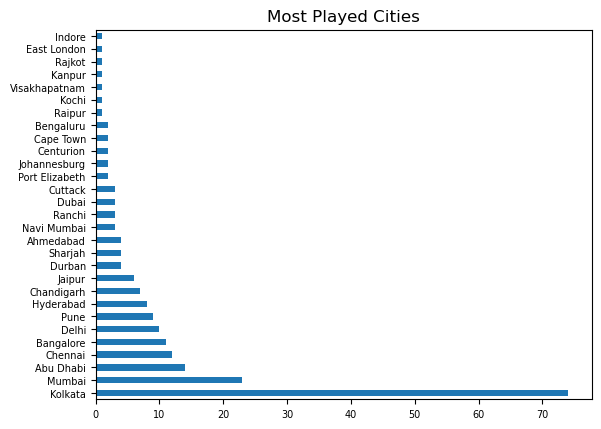

In [20]:
# code here
# print(ipl[(ipl["Team1"] == "Kolkata Knight Riders") | (ipl["Team2"] == "Kolkata Knight Riders")]["City"].value_counts().sort_values(ascending=False))

ipl[(ipl["Team1"] == "Kolkata Knight Riders") | (ipl["Team2"] == "Kolkata Knight Riders")]["City"].value_counts().plot(kind="barh",
                                                                                                                       title="Most Played Cities", fontsize=7.0)


### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [21]:
# code here
x = ipl[(ipl["Season"] == "2011") & ((ipl["Team1"] == "Mumbai Indians") |(ipl["Team2"] == "Mumbai Indians"))]["Margin"].mean()
print('The average margin of the team "Mumbai Indians" is {}'.format(x))

The average margin of the team "Mumbai Indians" is 19.25
